# Solving the Heat Equation

In [1]:
using ModelingToolkit, MethodOfLines, OrdinaryDiffEq, DomainSets

## 1D Heat Equation

Recall:

$$ u_t = \kappa u_{xx} $$

In [33]:
@parameters x t
@variables u(..)
Dt = Differential(t)
Dx = Differential(x)
Dxx = Differential(x)^2


x_min = t_min = 0.0
x_max = 1.0
t_max = 100.

κ = 1e-3
eq = Dt(u(x,t)) ~ κ*Dxx(u(x,t)) 

domains = [x ∈ Interval(x_min, x_max),
           t ∈ Interval(t_min, t_max)]

# IC and BCs
u0(x, t) = sin((pi/(x_max-x_min)) * x)
bcs = [
    u(x, 0) ~ u0(x, 0),
    u(0, t) ~ 0.,
    u(1, t) ~ 0.
]

@named pdesys = PDESystem(eq, bcs, domains, [x, t], [u(x, t)])

PDESystem
Equations: Equation[Differential(t)(u(x, t)) ~ 0.001Differential(x)(Differential(x)(u(x, t)))]
Boundary Conditions: Equation[u(x, 0) ~ sin(3.141592653589793x), u(0, t) ~ 0.0, u(1, t) ~ 0.0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, 0.0 .. 1.0), Symbolics.VarDomainPairing(t, 0.0 .. 100.0)]
Dependent Variables: Num[u(x, t)]
Independent Variables: Num[x, t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [34]:
N = 100
order = 2       
discretization = MOLFiniteDifference([x => N], t, approx_order = order)
prob = discretize(pdesys, discretization);

In [35]:
sol = solve(prob, TRBDF2(), saveat = 1.);

In [36]:
discrete_x = sol[x]
discrete_t = sol[t]
solu = sol[u(x, t)];

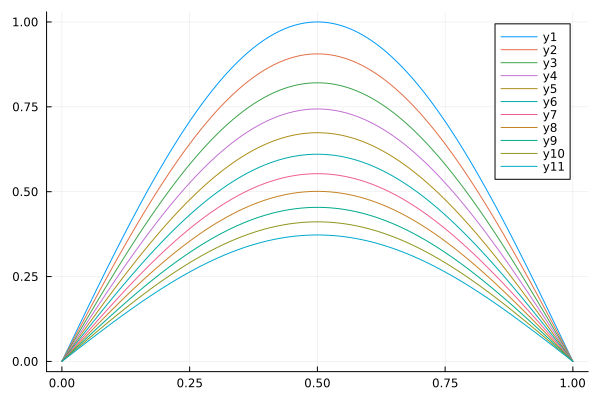

In [37]:
using Plots

plot(discrete_x, solu[:, 1:10:end])

## 1D Heat Equation and MMS

$$ u(x,t) = \cos(x) \exp(-t) $$

Into:

$$ u_t - u_{xx} = S $$

gives

$$ - \cos(x) \exp(-t) + \cos(x) \exp(-t) = S $$

$$ S = 0 $$

### Dirichlet BCs

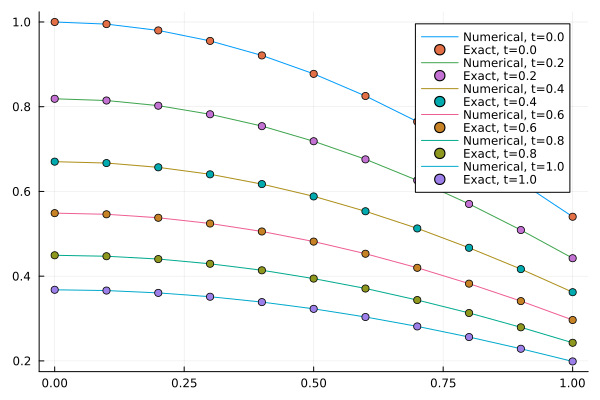

In [50]:
using OrdinaryDiffEq, ModelingToolkit, MethodOfLines, DomainSets

# Method of Manufactured Solutions: exact solution
u_exact = (x, t) -> exp.(-t) * cos.(x)

# Parameters, variables, and derivatives
@parameters t x
@variables u(..)
Dt = Differential(t)
Dxx = Differential(x)^2

# 1D PDE and boundary conditions
eq = Dt(u(t, x)) ~ Dxx(u(t, x))
bcs = [
    u(0, x) ~ cos(x),
    u(t, 0) ~ exp(-t),
    u(t, 1) ~ exp(-t) * cos(1)
]

# Space and time domains
domains = [
    t ∈ Interval(0.0, 1.0),
    x ∈ Interval(0.0, 1.0)
]

# PDE system
@named pdesys = PDESystem(eq, bcs, domains, [t, x], [u(t, x)])

# Method of lines discretization
dx = 0.1
order = 2
discretization = MOLFiniteDifference([x => dx], t)

# Convert the PDE problem into an ODE problem
prob = discretize(pdesys, discretization)

# Solve ODE problem
using OrdinaryDiffEq
sol = solve(prob, Tsit5(), saveat = 0.2)

# Plot results and compare with exact solution
discrete_x = sol[x]
discrete_t = sol[t]
solu = sol[u(t, x)]

using Plots
plt = plot()

for i in eachindex(discrete_t)
    plot!(discrete_x, solu[i, :], label = "Numerical, t=$(discrete_t[i])")
    scatter!(
        discrete_x, u_exact(discrete_x, discrete_t[i]), label = "Exact, t=$(discrete_t[i])")
end
plt

### Neumann BCs

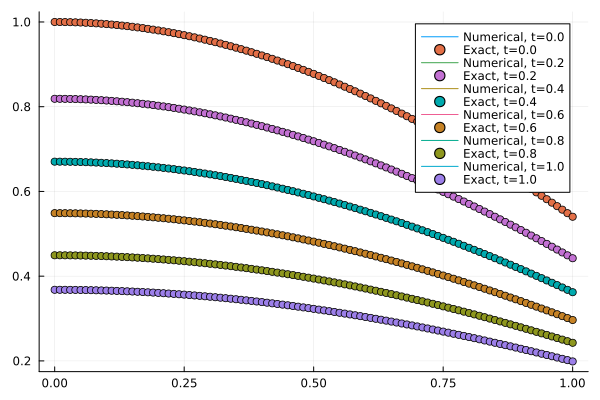

In [51]:
bcs = [
    u(0, x) ~ cos(x),
    Dx(u(t, 0)) ~ 0.0,
    Dx(u(t, 1)) ~ -exp(-t) * sin(1)
]

# PDE system
@named pdesys = PDESystem(eq, bcs, domains, [t, x], [u(t, x)])

# Method of lines discretization
dx = 0.01
order = 2
discretization = MOLFiniteDifference([x => dx], t)

# Convert the PDE problem into an ODE problem
prob = discretize(pdesys, discretization)

# Solve ODE problem
sol = solve(prob, Tsit5(), saveat = 0.2)

# Plot results and compare with exact solution
discrete_x = sol[x]
discrete_t = sol[t]
solu = sol[u(t, x)]

plt = plot()

for i in eachindex(discrete_t)
    plot!(discrete_x, solu[i, :], label = "Numerical, t=$(discrete_t[i])")
    scatter!(
        discrete_x, u_exact(discrete_x, discrete_t[i]), label = "Exact, t=$(discrete_t[i])")
end
plt

## 2D Heat Equation

In [38]:
@parameters x y t
@variables u(..)
Dt = Differential(t)
Dx = Differential(x)
Dxx = Differential(x)^2
Dy = Differential(y)
Dyy = Differential(y)^2
∇²(u) = Dxx(u) + Dyy(u)

x_min = y_min = t_min = 0.0
x_max = y_max = 1.0
t_max = 100.

κ = 1e-3
eq = Dt(u(x,y,t)) ~ κ*∇²(u(x,y,t))

domains = [x ∈ Interval(x_min, x_max),
           y ∈ Interval(y_min, y_max),
           t ∈ Interval(t_min, t_max)]

# IC and BCs
u0(x,y,t) = sin((pi/(x_max-x_min)) * x) * sin((pi/(y_max-y_min)) * y)

bcs = [
    u(x,y,0) ~ u0(x,y,0),
    u(0,y,t) ~ 0.,
    u(x,0,t) ~ 0.
]

@named pdesys = PDESystem(eq, bcs, domains, [x,y,t], [u(x,y,t)])

PDESystem
Equations: Equation[Differential(t)(u(x, y, t)) ~ 0.001(Differential(x)(Differential(x)(u(x, y, t))) + Differential(y)(Differential(y)(u(x, y, t))))]
Boundary Conditions: Equation[u(x, y, 0) ~ sin(3.141592653589793x)*sin(3.141592653589793y), u(0, y, t) ~ 0.0, u(x, 0, t) ~ 0.0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, 0.0 .. 1.0), Symbolics.VarDomainPairing(y, 0.0 .. 1.0), Symbolics.VarDomainPairing(t, 0.0 .. 100.0)]
Dependent Variables: Num[u(x, y, t)]
Independent Variables: Num[x, y, t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [ ]:
N = 25
order = 2       
discretization = MOLFiniteDifference([x => N, y => N], t, approx_order = order)
prob = discretize(pdesys, discretization);

In [40]:
sol = solve(prob, TRBDF2(), saveat = 1.);

In [41]:
discrete_x = sol[x]
discrete_y = sol[y]
discrete_t = sol[t]
solu = sol[u(x,y,t)];

┌ Info: Saved animation to c:\Users\jonas\OneDrive\Desktop\Programming\Julia\Math_and_Numerical_Methods\Notebooks\Differential_Equations\PDEs\Method_of_Lines\HeatEqation2D.gif
└ @ Plots C:\Users\jonas\.julia\packages\Plots\UitjO\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\jonas\\OneDrive\\Desktop\\Programming\\Julia\\Math_and_Numerical_Methods\\Notebooks\\Differential_Equations\\PDEs\\Method_of_Lines\\HeatEqation2D.gif")
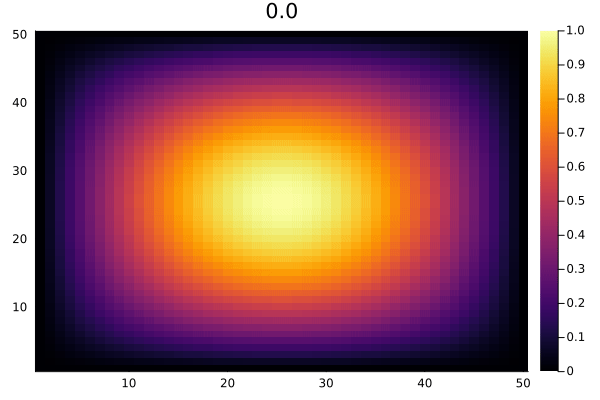

In [49]:
using Plots

anim = @animate for k in 1:length(discrete_t)
    heatmap(solu[:,:,k], title = "$(discrete_t[k])", clim=(0.,1.0)) # 2:end since end = 1, periodic condition
end
gif(anim, "HeatEqation2D.gif", fps = 8)